In [43]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:

models = ["Mistral", "Mistral Nemo", "Mistral Small", "Qwen8", "Qwen14", "Gemma12", "Gemma27"]
x = np.arange(len(models))
## Solo 

# Memory utilized (GB) for different scenarios
memory_data = {
    "SP": [1.02, 5.17, 9.51, 3.97, 6.50, 1.6, 2.3],
    "I-AGB": [2.80, 4.61, 9.17, 4.33, 6.12, 0, 0],
    "CH-AGB": [3.29, 4.49, 6.92, 2.03, 6.41, 0, 0],
    "CA-AGB": [3.32, 5.02, 7.78, 21.79, 6.55, 0, 0],
}

# Wall clock time (hours)
time_data = {
    "SP": [0 + 46/60 + 30/3600,
             1 + 12/60 + 49/3600,
             1 + 51/60 + 38/3600,
             1 + 31/60 + 21/3600,
             1 + 20/60 + 18/3600,
             2 + 12/60 + 30/3600,
             3 + 30/60 + 30/3600], 
    "I-AGB": [3 + 53/60 + 21/3600,
                   4 + 29/60 + 27/3600,
                   8 + 53/60 + 14/3600,
                   4 + 58/60 + 55/3600,
                   5 + 35/60 + 1/3600,
                   0,
                   0],
    "CH-AGB": [4 + 46/60 + 48/3600,
                  5 + 52/60 + 41/3600,
                  8 + 57/60 + 56/3600,
                  5 + 17/60 + 21/3600,
                  6 + 30/60 + 33/3600,
                  0,
                  0],
    "CA-AGB": [7 + 10/60 + 33/3600,
                8 + 36/60 + 46/3600,
                15 + 25/60 + 44/3600,
                6 + 48/60 + 8/3600,
                6 + 47/60 + 36/3600,
                0,
                0],
}


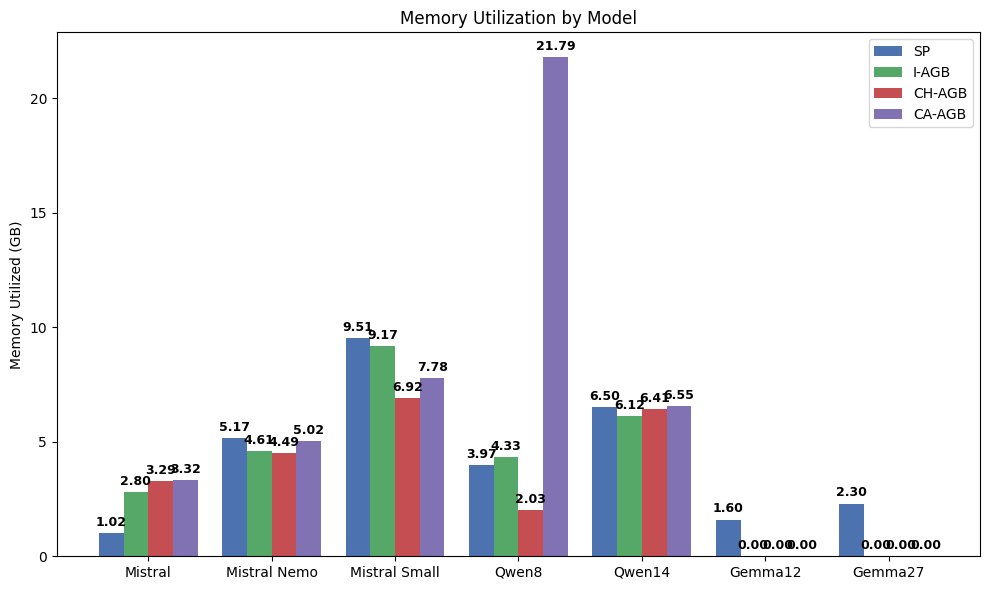

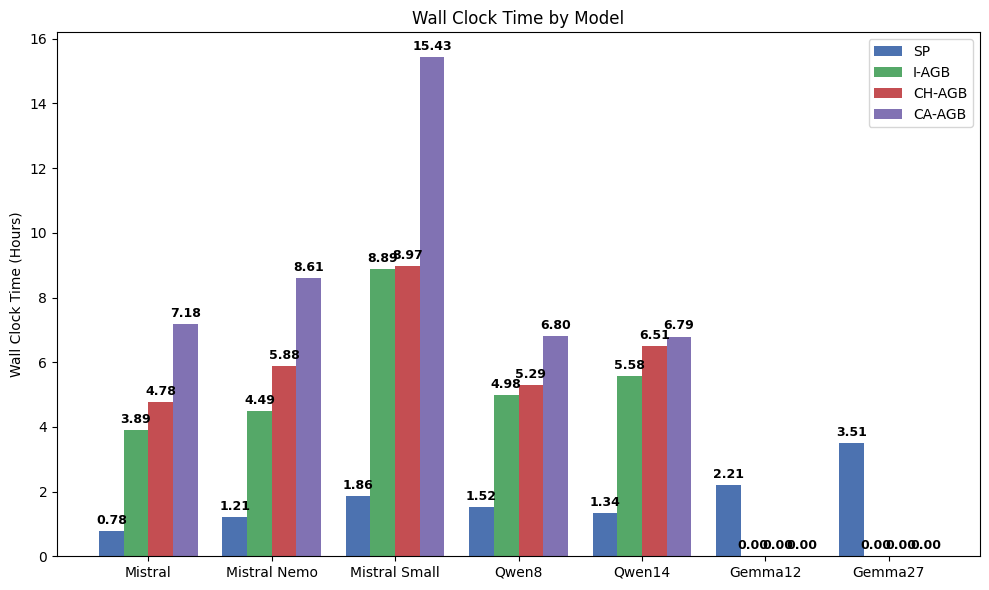

In [45]:
# Replotting with value labels on top of bars
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']

# Function to add value labels on bars
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# Memory Utilization Chart with labels
fig1, ax1 = plt.subplots(figsize=(10, 6))
bars_group1 = []
for i, (key, values) in enumerate(memory_data.items()):
    width = 0.2  # Width of each bar
    bars = ax1.bar(x + i*width - 1.5*width, values, width=width, label=key, color=colors[i])
    bars_group1.extend(bars)
    add_labels(ax1, bars)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_ylabel("Memory Utilized (GB)")
ax1.set_title("Memory Utilization by Model")
ax1.legend()
plt.tight_layout()

# Wall Clock Time Chart with labels
fig2, ax2 = plt.subplots(figsize=(10, 6))
bars_group2 = []
for i, (key, values) in enumerate(time_data.items()):
    bars = ax2.bar(x + i*width - 1.5*width, values, width=width, label=key, color=colors[i])
    bars_group2.extend(bars)
    add_labels(ax2, bars)
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.set_ylabel("Wall Clock Time (Hours)")
ax2.set_title("Wall Clock Time by Model")
ax2.legend()
plt.tight_layout()

plt.show()
